
# Business Analysis at online ticket service Yandex.Afisha

## Project description
The task is to recommend for Yandex.Afisha what marketing expenses to optimize.
The data:
Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
Dump file with all orders for the period
Marketing expenses statistics
Necessary to study:<br>
<b>How people use the product<br>
When they start to buy<br>
How much money each customer brings<br>
When they pay off<b>

## Project plan



#### [1. Download the data and prepare it for analysis](#1-Data-open)

#### [2. Make reports and calculate metrics](#2-Make-reports-and-calculate-metrics)
#####     [2.1. How many people use it every day, week, and month?](#2.1-How-many-people-use-it-every-day_week_month?)
#####     [2.2. How many sessions are there per day?](#2.2-How-many-sessions-are-there-per-day?)
#####     [2.3. What is the length of each session?](#2.3-What-is-the-length-of-each-session?)
#####     [2.4. How often do users come back?](#2.4-How-often-do-users-come-back?)

#### [3. Sales&Marketing](#3-Sales-&-Marketing)
##### [3.1. When do people start buying?](#3.1-When-do-people-start-buying?)
##### [3.2. How many orders do they make during a given period of time?](#3.2-How-many-orders-do-they-make-during-a-given-period-of-time?)
##### [3.3. What is the average purchase size?](#3.3-What-is-the-average-purchase-size?)
##### [3.4. How much money do they bring LTV?](#3.4-How-much-money-do-they-bring-LTV?)
##### [3.5.  costs distribution per sources](#3.5-Costs-distribution-per-sources)
##### [3.6. CAC per user](#3.6-CAC-per-user)
##### [3.7. ROMI and average pay off](#3.7-ROMI-and-average-pay-off)
#### [4. Write a conclusion: advise marketing experts how much money to invest and where](#4-Conclusion)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline
import math


### 1 Data open
Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.

In [2]:
def unpack (a,b):
    try:
        data = pd.read_csv(a)
        return data
    except:
        data = pd.read_csv(b)
        return data
    

df_costs = unpack('/datasets/costs_us.csv','C:\\Users\\test\\anaconda3\\envs\\Project_Business_Analytics\\costs_us.csv')
df_orders = unpack('/datasets/orders_log_us.csv','C:\\Users\\test\\anaconda3\\envs\\Project_Business_Analytics\\orders_log_us.csv')
df_visits = unpack('/datasets/visits_log_us.csv','C:\\Users\\test\\anaconda3\\envs\\Project_Business_Analytics\\visits_log_us.csv')

In [3]:
#df_costs.info() 
#df_costs.source_id.unique() 
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
df_costs.describe()


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
df_orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [6]:
df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'])
df_orders['Buy Ts'].min()
df_orders['Buy Ts'].max()

Timestamp('2018-06-01 00:02:00')

In [7]:

df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'])
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [8]:
df_visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [9]:
duplicateRows_visits = df_visits[df_visits.duplicated(['Uid', 'Start Ts', 'End Ts'])]
duplicateRows_visits

,Device,End Ts,Source Id,Start Ts,Uid


<div style='color:blue'>We have downloaded data, looked at the structure, unique values, checked for duplicates and transfered to dates into a readable by pandas format.  </div>

#### [Project plan](#Project-plan)

### 2 Make reports and calculate metrics


#### 2.1 How many people use it every day_week_month?


In [10]:
df_visits['visits_year'] = df_visits['Start Ts'].dt.year
df_visits['visits_month'] = df_visits['Start Ts'].dt.month
df_visits['visits_day'] = df_visits['Start Ts'].dt.day
df_visits['visits_week'] = df_visits['Start Ts'].dt.week
df_visits

,Device,End Ts,Source Id,Start Ts,Uid,visits_year,visits_month,visits_day,visits_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,20,51
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,19,8
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,1,26
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,27,52
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,29,30
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,25,4
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,3,9
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,2,44


In [11]:
#unique visits per month
df_visits_per_month = df_visits.groupby(['visits_year',
                                         'visits_month']).agg({'Uid':['nunique']})

df_visits_per_month

Uid
                         nunique
visits_year visits_month        
2017        6              13259
            7              14183
            8              11631
            9              18975
            10             29692
            11             32797
            12             31557
2018        1              28716
            2              28749
            3              27473
            4              21008
            5              20701

Uid  nunique    23228.416667
dtype: float64

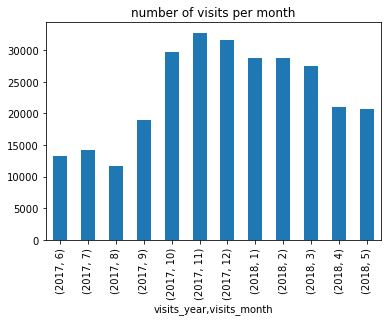

In [12]:
df_visits_per_month.plot.bar(title = 'number of visits per month', legend=False)
df_visits_per_month.mean()

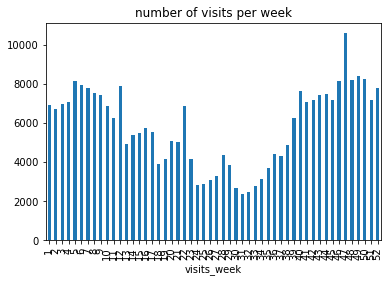

In [13]:
#unique visits per week
df_visits_per_week = df_visits.groupby(['visits_week']).agg({'Uid':'nunique'})
df_visits_per_week.plot.bar(title = 'number of visits per week', legend=False);


#### 2.2 How many sessions are there per day? 

One user might have more than one session.

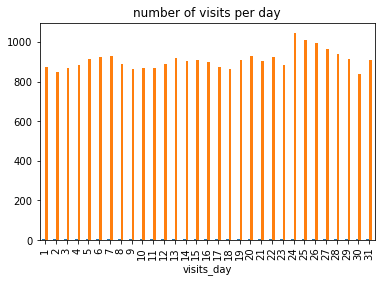

In [14]:
#total visits and unique user's visits per day
df_visits_per_day = df_visits.groupby(['visits_month',
                                       'visits_day']).agg({'Uid': 'nunique'}).reset_index()
df_visits_per_day =df_visits_per_day.groupby('visits_day').mean()
df_visits_per_day.plot.bar(title = 'number of visits per day', legend=False);
#df_visits_per_day.mean()

<div style='color:blue'>
    The average number of people visiting the application monthly 23228, weekly 5825 and daily 907. As per plots, the users are most active in November, December and January. And also they use the application more number of times by the end of a month 
</div>

#### 2.3 What is the length of each session?


0    60
dtype: int64

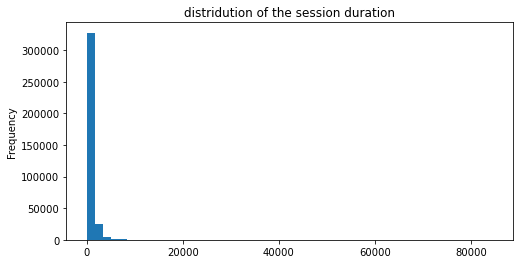

In [15]:
#how long is a session
df_visits['session_duration'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.seconds
df_visits_session_length = df_visits['session_duration'].mode()
df_visits['session_duration'].plot.hist(bins=50,figsize=(8,4), title='distridution of the session duration');
df_visits_session_length

<div style='color:blue'>
    The mode is 60 sec per session
</div>

#### 2.4 How often do users come back?

In [16]:
unique_users = df_visits['Uid'].nunique()
unique_users

228169

In [17]:
come_backs = df_visits[['Uid', 'Start Ts']].groupby('Uid').agg({'Start Ts':'count'}).reset_index()
come_backs

,Uid,Start Ts
0,11863502262781,1
1,49537067089222,1
2,297729379853735,1
3,313578113262317,3
4,325320750514679,2
...,...,...
228164,18446403737806311543,1
228165,18446424184725333426,1
228166,18446556406699109058,1
228167,18446621818809592527,2


In [18]:
come_back_times = come_backs.pivot_table(index='Start Ts', values='Uid', aggfunc='count')
come_back_times

,Uid
Start Ts,
1,176041
2,30926
3,10184
4,4357
5,2283
...,...
343,1
357,1
551,1


<div style='color:blue'>
We learned that the total unique users are 228169. 176040 users never returned. It means that 52129 users came back once or more times. It is about 22,8%.
</div>

<div style='color:blue'> To learn how often users return after registration/visit, we should calculate the retention level.
    </div>

In [19]:
#The actual first visit is calculated here
min_visits = df_visits.groupby(['Uid'])['Start Ts'].min().reset_index()
min_orders = df_orders.groupby(['Uid'])['Buy Ts'].min().reset_index()
actual_first_visit = min_visits.merge(min_orders, on='Uid', how='left')
actual_first_visit['first_visit'] = actual_first_visit.apply(lambda row: row['Start Ts'] if \
    row['Start Ts']<row['Buy Ts'] or isinstance(row['Buy Ts'],pd._libs.tslibs.nattype.NaTType) else\
                                                            row['Buy Ts'], axis=1)
actual_first_visit

,Uid,Start Ts,Buy Ts,first_visit
0,11863502262781,2018-03-01 17:27:00,NaT,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00,NaT,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00,NaT,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00,NaT,2017-09-30 14:29:00
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00,NaT,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00,NaT,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00,NaT,2017-12-27 13:27:00


In [20]:
retention_data = df_visits.merge(actual_first_visit[['Uid','first_visit']], on='Uid', how='left')
retention_data['retention_date'] = ((retention_data['Start Ts']-retention_data['first_visit'])\
                                    /np.timedelta64(1,'D')).astype(int)
retention_data['first_visit_cohort'] = retention_data['Start Ts'].dt.strftime('%Y-%m')
retention_data

,Device,End Ts,Source Id,Start Ts,Uid,visits_year,visits_month,visits_day,visits_week,session_duration,first_visit,retention_date,first_visit_cohort
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,20,51,1080,2017-12-20 17:20:00,0,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,19,8,1680,2018-02-19 16:53:00,0,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,1,26,0,2017-07-01 01:54:00,0,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,1440,2018-03-09 20:05:00,71,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,27,52,0,2017-12-27 14:06:00,0,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,7,29,30,19,2017-07-29 19:07:00,0,2017-07
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,1,25,4,19,2018-01-25 17:38:00,0,2018-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,3,3,9,19,2018-03-03 10:12:00,0,2018-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,11,2,44,19,2017-11-02 10:12:00,0,2017-11


In [21]:
#cleaning the registration from the visit table and select those users who came second time. 
#If the retention data is still 0, the user came back on the date of the registration
retention_data_clean = retention_data[retention_data['Start Ts']!=retention_data['first_visit']]
retention_data_clean

,Device,End Ts,Source Id,Start Ts,Uid,visits_year,visits_month,visits_day,visits_week,session_duration,first_visit,retention_date,first_visit_cohort
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,20,1440,2018-03-09 20:05:00,71,2018-05
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018,1,30,5,3360,2017-06-29 09:00:00,215,2018-01
11,desktop,2018-01-25 19:41:00,1,2018-01-25 19:37:00,7478054213403174082,2018,1,25,4,240,2018-01-25 14:16:00,0,2018-01
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018,2,6,6,300,2017-06-04 14:17:00,247,2018-02
14,touch,2018-04-23 18:01:00,9,2018-04-23 18:00:00,18026419100367255411,2018,4,23,17,60,2017-10-04 22:44:00,200,2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358521,desktop,2018-01-21 17:41:00,4,2018-01-21 17:29:00,9892427580703881255,2018,1,21,3,720,2017-12-27 07:45:00,25,2018-01
358523,desktop,2018-04-23 13:24:00,5,2018-04-23 13:15:00,7747553584236614757,2018,4,23,17,540,2018-04-23 13:08:00,0,2018-04
358528,touch,2018-05-15 23:09:00,2,2018-05-15 23:08:00,11171727274084046837,2018,5,15,20,60,2017-09-29 21:13:00,228,2018-05
358529,desktop,2018-05-06 20:27:00,5,2018-05-06 20:27:00,13482259146982443019,2018,5,6,18,0,2018-04-11 12:49:00,25,2018-05


In [22]:
#calculating the rolling retention per sourse
retention_data_clean['roling_retention_0d'] = retention_data_clean['retention_date'].apply(lambda x: x>=0)
retention_data_clean['roling_retention_7d'] = retention_data_clean['retention_date'].apply(lambda x: x>=7)
retention_data_clean['roling_retention_14d'] = retention_data_clean['retention_date'].apply(lambda x: x>=14)
retention_data_clean['roling_retention_30d'] = retention_data_clean['retention_date'].apply(lambda x: x>=30)
registrations=df_visits.groupby(['Source Id'])['Uid'].nunique().reset_index().rename(columns={'Uid':'registered'})
registrations

<ipython-input-22-8613a163e1d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_data_clean['roling_retention_0d'] = retention_data_clean['retention_date'].apply(lambda x: x>=0)
<ipython-input-22-8613a163e1d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retention_data_clean['roling_retention_7d'] = retention_data_clean['retention_date'].apply(lambda x: x>=7)
<ipython-input-22-8613a163e1d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,Source Id,registered
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [23]:
#function calculating % of retention
def retention(column):
    abs_retenion=retention_data_clean[retention_data_clean[column]==True]\
    .groupby(['Source Id'])['Uid'].nunique().reset_index().rename(columns={'Uid':'{}'.format(column)})
    retentions=registrations.merge(abs_retenion,on=['Source Id'],how='left')
    retentions['{}%'.format(column)]=(retentions['{}'.format(column)]*100/retentions['registered']).fillna(0)
    retentions=retentions[['Source Id','{}%'.format(column)]]
    return retentions
new_retention=[]
for i in ['roling_retention_0d','roling_retention_7d','roling_retention_14d','roling_retention_30d']:
    new_retention.append(retention(i))
rolling_retention=pd.concat(new_retention,axis=1)

rolling_retention=rolling_retention.loc[:,~rolling_retention.columns.duplicated()]
rolling_retention

,Source Id,roling_retention_0d%,roling_retention_7d%,roling_retention_14d%,roling_retention_30d%
0,1,58.550450,28.790989,25.090794,20.195800
1,2,45.532482,32.474757,28.896933,23.836921
2,3,19.055327,14.905827,13.774145,11.944192
3,4,22.509428,17.415145,15.808441,13.210416
4,5,21.295679,12.844455,11.503493,9.534173
5,6,66.666667,50.000000,33.333333,16.666667
6,7,5.882353,5.882353,5.882353,5.882353
7,9,46.524180,41.925734,39.075993,33.657168
8,10,21.371018,14.156440,12.693690,10.549151


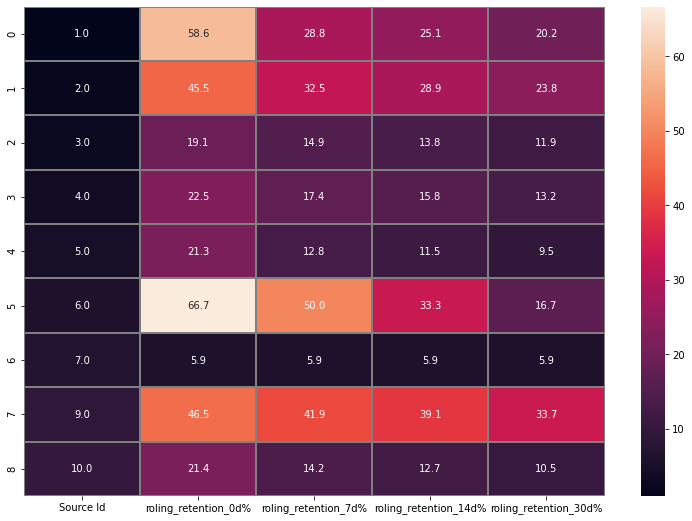

In [24]:
plt.figure(figsize=(13, 9))
#plt.title('Retention heatmap')
sns.heatmap(rolling_retention, annot=True, fmt='.1f', linewidths=1, linecolor='gray');

<div style='color:blue'>We have found out that per month 23228 users visit the YandexAfisha services online. <br>
    Daily unique users 907 and sessions per day 987. The avarage session is 60 sec.<br>
    Only 22,8% of users come back to the application. Maybe the registration was not an easy process. It is necessary to check the funnel.<br>
    Retention heatmap shows that the 1,2 and 9 sourses retain most of the users. We should check whether they are also profitable.</div>

In [25]:
first_visit_cohort_registrations = retention_data.groupby('first_visit_cohort')['Uid'].nunique().reset_index().rename(columns={'Uid':'registered'})
first_visit_cohort_registrations

,first_visit_cohort,registered
0,2017-06,13259
1,2017-07,14183
2,2017-08,11631
3,2017-09,18975
4,2017-10,29692
5,2017-11,32797
6,2017-12,31557
7,2018-01,28716
8,2018-02,28749
9,2018-03,27473


In [26]:
#function calculating % of retention on first_visit_cohort
def retention(column):
    abs_retenion=retention_data_clean[retention_data_clean[column]==True]\
    .groupby(['first_visit_cohort'])['Uid'].nunique().reset_index().rename(columns={'Uid':'{}'.format(column)})
    retentions=first_visit_cohort_registrations.merge(abs_retenion,on=['first_visit_cohort'],how='left')
    retentions['{}%'.format(column)]=(retentions['{}'.format(column)]*100/retentions['registered']).fillna(0)
    retentions=retentions[['first_visit_cohort','{}%'.format(column)]]
    return retentions
new_retention_cohort=[]
for i in ['roling_retention_0d','roling_retention_7d','roling_retention_14d','roling_retention_30d']:
    new_retention_cohort.append(retention(i))
rolling_retention=pd.concat(new_retention_cohort,axis=1)

rolling_retention=rolling_retention.loc[:,~rolling_retention.columns.duplicated()]
rolling_retention['first_visit_cohort'] = rolling_retention['first_visit_cohort'].astype('category')
rolling_retention

,first_visit_cohort,roling_retention_0d%,roling_retention_7d%,roling_retention_14d%,roling_retention_30d%
0,2017-06,12.806396,4.004827,2.255072,0.000000
1,2017-07,18.571529,9.617147,7.614750,4.011845
2,2017-08,20.436764,14.177629,12.612845,9.534864
3,2017-09,22.023715,14.002635,12.252964,9.507246
4,2017-10,23.585478,15.293682,13.283039,9.736629
5,2017-11,28.478214,19.541421,17.279019,13.711620
6,2017-12,29.825395,21.874703,19.589948,15.641538
7,2018-01,29.579329,22.847890,21.089288,18.675999
8,2018-02,31.152388,24.293019,22.418171,19.830255
9,2018-03,33.705820,26.564263,24.977250,22.290977


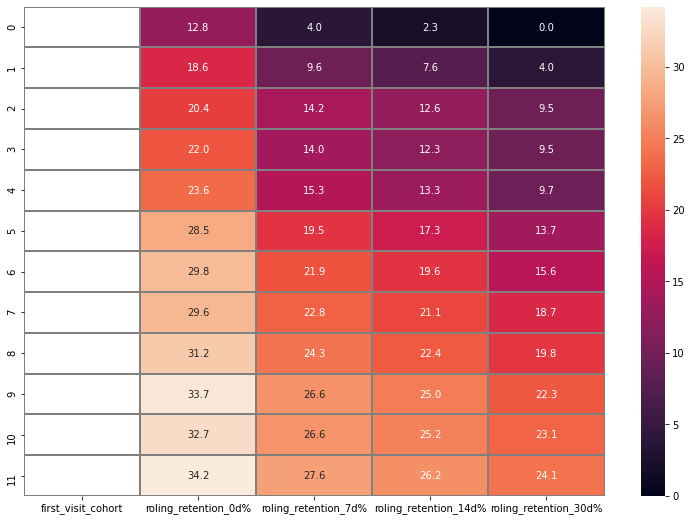

In [27]:
#plot RR heatmap similar to your LTV heatmap (using 1 month Lifetime period )
rolling_retention['first_visit_cohort'] = pd.to_numeric(rolling_retention.first_visit_cohort,  errors='coerce')

plt.figure(figsize=(13, 9))
#plt.title('Retention_cohort heatmap')
sns.heatmap(rolling_retention, annot=True, fmt='.1f', linewidths=1, linecolor='gray');

<div style='color:blue'>
   Later cohorts have higher RR
   
</div>

In [28]:
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
first_visit_date = df_visits.groupby('Uid')['Start Ts'].min()
first_visit_date.name = 'first_visit_date'
#first_visit_date = first_visit_date.reset_index()
first_visit_date

Uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_visit_date, Length: 228169, dtype: datetime64[ns]

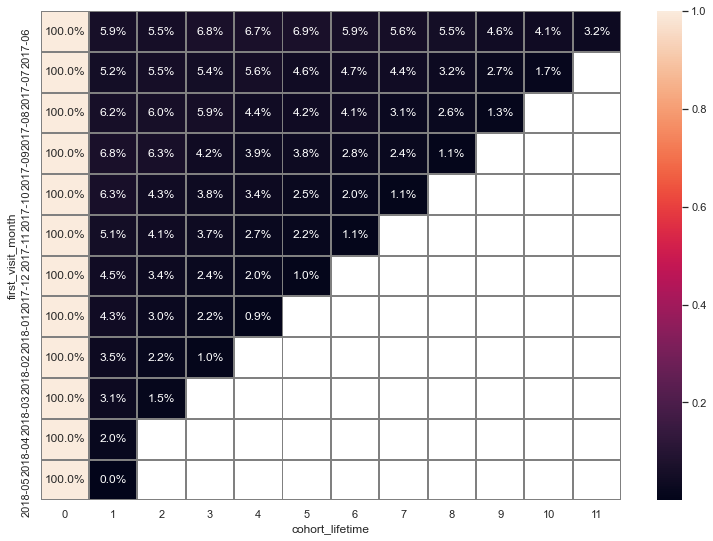

In [29]:
retention = df_visits.join(first_visit_date, on='Uid')
retention['cohort_lifetime'] = ((retention['Start Ts']-retention['first_visit_date'])/np.timedelta64(1,'M')).astype(int)
retention['first_visit_month'] = retention['first_visit_date'].dt.strftime('%Y-%m')
cohorts = retention.groupby(['first_visit_month','cohort_lifetime']).agg({'Uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
sns.set(style='white')
plt.figure(figsize=(13, 9))
#plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 

<div style='color:blue'>
   Cohorts RR  on the heatmap. First three and the one before last are highest.
   
</div>

#### [Project plan](#Project-plan)

#### 3 Sales & Marketing

#### 3.1 When do people start buying?

We need to analyze period / lenghth between first visit and first order

In [30]:
min_orders

,Uid,Buy Ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


In [31]:
conversion_data = min_orders.merge(actual_first_visit[['Uid','first_visit']], on='Uid', how='left')
conversion_data['conversion_date'] = ((conversion_data['Buy Ts']-conversion_data['first_visit'])/np.timedelta64(1,'D')).astype(int)
conversion_data

,Uid,Buy Ts,first_visit,conversion_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0
...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,95
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103


In [32]:
source_per_user = df_visits.groupby('Uid')['Source Id'].min()
source_per_user

Uid
11863502262781          3
49537067089222          2
297729379853735         3
313578113262317         2
325320750514679         5
                       ..
18446403737806311543    5
18446424184725333426    4
18446556406699109058    3
18446621818809592527    4
18446676030785672386    3
Name: Source Id, Length: 228169, dtype: int64

In [33]:
first_order_date = conversion_data.merge(source_per_user, on='Uid', how="left")
first_order_date

,Uid,Buy Ts,first_visit,conversion_date,Source Id
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,10
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0,3
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,5
...,...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,95,5
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,0,2
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,231,2
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,103,1


In [34]:
conversion_per_source = first_order_date.groupby('Source Id')['conversion_date'].mean().round().reset_index(inplace=False)
conversion_per_source

,Source Id,conversion_date
0,1,24.0
1,2,24.0
2,3,16.0
3,4,12.0
4,5,7.0
5,7,0.0
6,9,31.0
7,10,6.0


<div style='color:blue'>The most of the returned users purchase on the first day, but the mean value per source differs. Users coming from source 5 and 10 are more ready to make purchase. Other sources bring users who prefer to postpone the purchase. It is interesting to learn how money do they bring afterwords.</div>

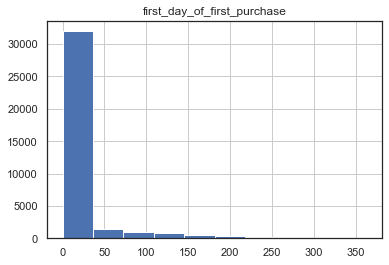

In [35]:
first_order_date['conversion_date'].hist()
plt.title("first_day_of_first_purchase");

<div style='color:blue'>Historgam shows the distribution of users per day of the first purchase. The largest number converted on the first day
   
</div>

#### 3.2 How many orders do they make during a given period of time?

In [36]:
cohort_per_user = retention_data.groupby('Uid')['first_visit'].min()
cohort_per_user.name = 'first_visit'
cohort_per_user = cohort_per_user.reset_index()
cohort_source_per_user = cohort_per_user.merge(source_per_user, how='left', on='Uid')
cohort_source_per_user['cohort_first_visit_month'] = cohort_source_per_user['first_visit'].dt.strftime('%Y-%m')
cohort_source_per_user

,Uid,first_visit,Source Id,cohort_first_visit_month
0,11863502262781,2018-03-01 17:27:00,3,2018-03
1,49537067089222,2018-02-06 15:55:00,2,2018-02
2,297729379853735,2017-06-07 18:47:00,3,2017-06
3,313578113262317,2017-09-18 22:49:00,2,2017-09
4,325320750514679,2017-09-30 14:29:00,5,2017-09
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,5,2017-11
228165,18446424184725333426,2017-12-06 20:32:00,4,2017-12
228166,18446556406699109058,2018-01-01 16:29:00,3,2018-01
228167,18446621818809592527,2017-12-27 13:27:00,4,2017-12


In [37]:
order_cohort_first_visit = df_orders.merge(cohort_source_per_user, how='left', on='Uid')
order_cohort_first_visit

,Buy Ts,Revenue,Uid,first_visit,Source Id,cohort_first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3,2017-06
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,4,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,10,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,3,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,3,2017-10


In [38]:
order_cohort_first_visit_avr_per_month = order_cohort_first_visit.groupby('cohort_first_visit_month')['Buy Ts'].count()
order_cohort_first_visit_avr_per_month

cohort_first_visit_month
2017-06    6397
2017-07    3545
2017-08    2638
2017-09    4346
2017-10    6233
2017-11    5983
2017-12    5236
2018-01    3864
2018-02    3866
2018-03    3545
2018-04    2285
2018-05    2477
Name: Buy Ts, dtype: int64

In [39]:
order_cohort_first_visit_per_source = order_cohort_first_visit.groupby('Source Id')['Buy Ts'].count()
order_cohort_first_visit_per_source

Source Id
1     15308
2      7468
3     11329
4      9253
5      5483
7         1
9       620
10      953
Name: Buy Ts, dtype: int64

<div style='color:blue'> Now we found out that the biggest number of orders are produced by 1, 2, 4 sources. One purchase for from Source 7 is irrelevant. Sources 6, 7 and 8 did not bring any purchases. June, October, November and December most productive on selling.
    </div>

In [40]:
order_cohort_first_visit

,Buy Ts,Revenue,Uid,first_visit,Source Id,cohort_first_visit_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3,2017-06
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,4,2018-05
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,10,2018-05
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,3,2018-05
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,3,2017-10


#### 3.3 What is the average purchase size?

In [41]:
order_cohort_first_visit_avr_per_source = order_cohort_first_visit.groupby('Source Id')['Revenue'].mean()
order_cohort_first_visit_avr_per_source

Source Id
1     6.639102
2     5.774470
3     3.826889
4     3.966912
5     4.180157
7     1.220000
9     3.022871
10    2.566863
Name: Revenue, dtype: float64

##### Average purchase

In [42]:
order_cohort_first_visit_avr_per_source.mean()

3.899657924016102

In [43]:
order_cohort_first_visit['Revenue'].mean()

4.999646930476993

In [44]:
rev_per_source = order_cohort_first_visit.groupby('Source Id')['Revenue'].sum().reset_index()
rev_per_source

,Source Id,Revenue
0,1,101631.38
1,2,43123.74
2,3,43354.82
3,4,36705.84
4,5,22919.80
5,7,1.22
6,9,1874.18
7,10,2446.22


<div style='color:blue'> 1,2 and 5 sources avg purchase is higher. The total sales are high on 1-5 sources. The ountstanding is 1, twice as larger in amount that source number 2
    </div>

<div style='color:blue'> Average purchase size is 5
    </div>

<div style='color:blue'>We added cohort number to the dataset. Now we shall calculate the convertion period</div>

#### 3.4 How much money do they bring LTV?

In [45]:
df_orders['order_month'] = df_orders['Buy Ts'].astype('datetime64[M]')
first_orders = df_orders.groupby('Uid').agg({'order_month':'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month','n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [46]:
df_orders_new = pd.merge(df_orders, first_orders, on='Uid')
df_orders_new

,Buy Ts,Revenue,Uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


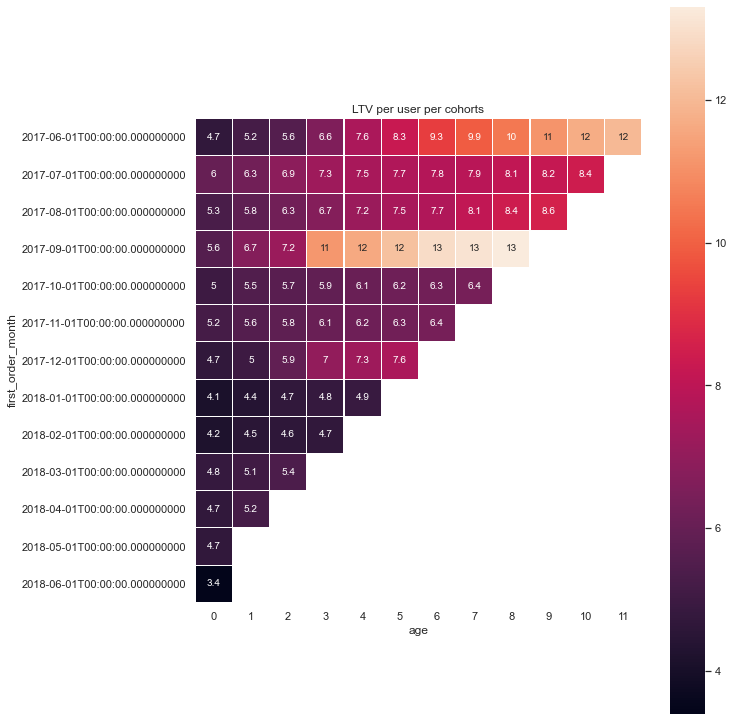

In [47]:
cohorts = df_orders_new.groupby(['first_order_month', 'order_month']).agg({'Revenue':'sum'}).reset_index()
report = pd.merge(cohorts, cohort_sizes, on='first_order_month')
report['age'] = (report['order_month'] - report['first_order_month'])/np.timedelta64(1,'M')
report['age'] = report['age'].round().astype(int)
report['ltv'] = report['Revenue']/report['n_buyers']
output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='sum').round(1).cumsum(axis=1)

output.fillna('') 
plt.figure(figsize=(10, 13))
plt.title('LTV per user per cohorts')
sns.heatmap(output, square=True, linewidths=0.1, annot=True, annot_kws = {"fontsize":10})

<div style='color:blue'> Now we know how much money is brought by a user in each of the cohort. Let's check how expensive is to attract a user by calculating CAC
    </div>

##### number of orders heatmap

In [48]:
df_orders_new['age'] = ((df_orders_new['order_month']-\
                         df_orders_new['first_order_month'])/np.timedelta64(1,'M')).round().astype(int)
df_orders_new

,Buy Ts,Revenue,Uid,order_month,first_order_month,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,0


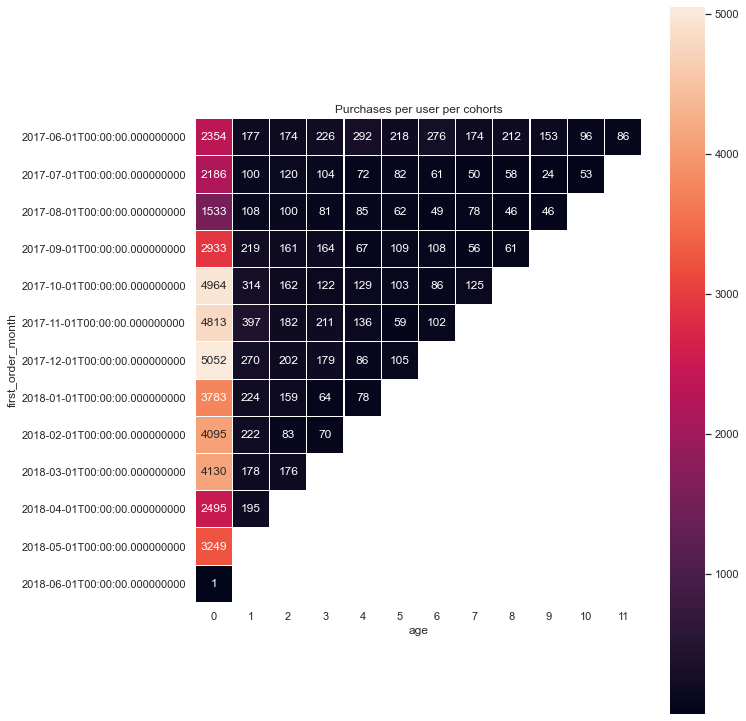

In [49]:
#number of orders per user per period. I chose to drow a heatmap per user's cohorts
output_purchases = df_orders_new.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='Uid', 
    aggfunc='count').round(2)

output_purchases.fillna('') 
plt.figure(figsize=(10, 13))
plt.title('Purchases per user per cohorts')
sns.heatmap(output_purchases, square=True, fmt='.0f',linewidths=0.1, annot=True, annot_kws = {"fontsize":12});

<div style='color:blue'>Number of orders mostly fall on the first month. October,  November, December are strongest cohorts.
</div>

#### 3.5 Costs distribution per sources

In [50]:
df_costs_source = df_costs.groupby('source_id')['costs'].sum()
df_costs_source.colunms = ['Source Id', 'costs']
df_costs_source = df_costs_source.reset_index()
df_costs_source = df_costs_source.rename(columns={'source_id':'Source Id'}, inplace = False)
costs_source = df_costs_source.merge(registrations, on='Source Id', how='left')
costs_source['cac'] = costs_source['costs']/costs_source['registered']
costs_source

,Source Id,costs,registered,cac
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434
5,9,5517.49,9264,0.595584
6,10,5822.49,8067,0.721766


In [51]:
#sales_source = df_orders.groupby('Source')['Revenue'].sum()
#sales_source
df_orders

,Buy Ts,Revenue,Uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01


In [52]:
profitablity_per_source = costs_source.merge(rev_per_source, how='left', on='Source Id')
profitablity_per_source['profit'] = profitablity_per_source['Revenue'] - profitablity_per_source['costs']
profitablity_per_source

,Source Id,costs,registered,cac,Revenue,profit
0,1,20833.27,18999,1.096546,101631.38,80798.11
1,2,42806.04,26245,1.631017,43123.74,317.70
2,3,141321.63,74756,1.890439,43354.82,-97966.81
3,4,61073.60,83525,0.731201,36705.84,-24367.76
4,5,51757.10,56974,0.908434,22919.80,-28837.30
5,9,5517.49,9264,0.595584,1874.18,-3643.31
6,10,5822.49,8067,0.721766,2446.22,-3376.27


<div style='color:blue'> CAC per source shows that most expensive are 1,2,3, 4 and 5. The profit bring sources 1,2.
    </div>

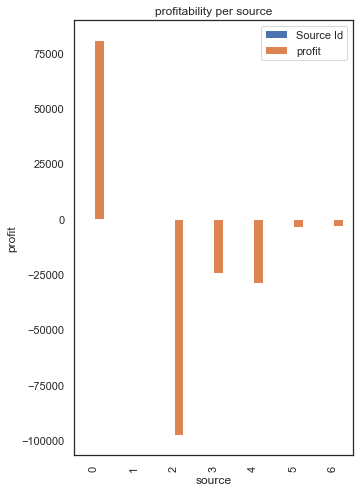

In [53]:
ax = profitablity_per_source[['Source Id', 'profit']].\
plot(kind="bar",layout=(700000, -70000), figsize=(5, 8), title='profitability per source')
ax.set_xlabel("source")
ax.set_ylabel("profit");

<div style='color:blue'>Positive profit vaues are source 1 and 2 
    </div>

#### 3.6 CAC per user

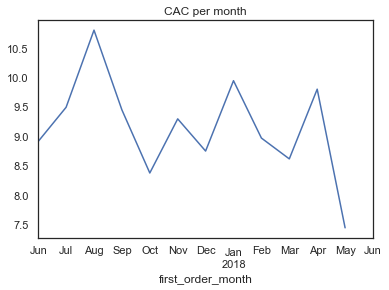

In [54]:
df_costs['first_order_month'] = df_costs['dt'].astype('datetime64[M]')
costs = df_costs.groupby('first_order_month')['costs'].sum().reset_index()
report_costs = report.merge(costs, on='first_order_month', how='left')
report_costs['cac'] = report_costs['costs'] / report_costs['n_buyers']
gr_cac = report_costs.groupby('first_order_month')['cac'].mean()
gr_cac.plot(title='CAC per month');


In [55]:
report_costs['cac'].mean()

9.319905176921111

<div style='color:blue'> CAC avg per user per month grows on August, November, January and April. AVG per user 9.3
    </div>

In [56]:
costs_source = df_costs.groupby(['source_id','first_order_month'])['costs'].sum().reset_index()
costs_source_report = costs_source.merge(df_orders_new, how='left', on='first_order_month')
costs_source_report


,source_id,first_order_month,costs,Buy Ts,Revenue,Uid,order_month,age
0,1,2017-06-01,1125.61,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,0
1,1,2017-06-01,1125.61,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,0
2,1,2017-06-01,1125.61,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,0
3,1,2017-06-01,1125.61,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,0
4,1,2017-06-01,1125.61,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,0
...,...,...,...,...,...,...,...,...
352893,10,2018-05-01,409.86,2018-05-31 23:43:00,3.67,1805512004303848280,2018-05-01,0
352894,10,2018-05-01,409.86,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,0
352895,10,2018-05-01,409.86,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,0
352896,10,2018-05-01,409.86,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,0


In [57]:
costs_source_report_rev = costs_source_report.\
                                 groupby(['source_id','first_order_month'])['costs'].median().reset_index()
costs_source_report_n = costs_source_report.groupby(['source_id','first_order_month'])['Revenue'].count().reset_index()
costs_source_report_m = costs_source_report.groupby(['source_id','first_order_month'])['Revenue'].sum().reset_index()
costs_source_report_n = costs_source_report_n.rename(columns = {'Revenue':'purchases'}, inplace = False)
total_report =  costs_source_report_n.merge(costs_source_report_rev) 
total_report_ = total_report.merge(costs_source_report_m)
total_report_

,source_id,first_order_month,purchases,costs,Revenue
0,1,2017-06-01,4438,1125.61,24031.69
1,1,2017-07-01,2910,1072.88,16127.92
2,1,2017-08-01,2188,951.81,11606.26
3,1,2017-09-01,3878,1502.01,34676.32
4,1,2017-10-01,6005,2315.75,27603.45
...,...,...,...,...,...
79,10,2018-01-01,4308,614.35,16663.13
80,10,2018-02-01,4470,480.88,16750.50
81,10,2018-03-01,4484,526.41,19273.41
82,10,2018-04-01,2690,388.25,11810.61


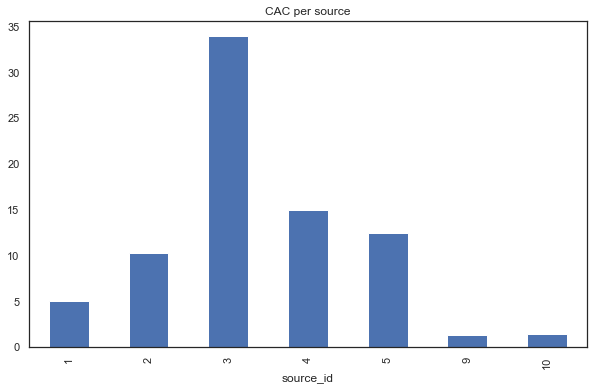

In [58]:
total_report_['cac'] = total_report_['costs'] / total_report_['purchases']
total_report_
gr_cac_source = total_report_.groupby(['source_id'])['cac'].sum()
gr_cac_source.plot(kind="bar",figsize=(10, 6), title='CAC per source');


<div style='color:blue'>Most expensive sources are 3,4 and 5 
    </div>

#### 3.7 ROMI and average pay off

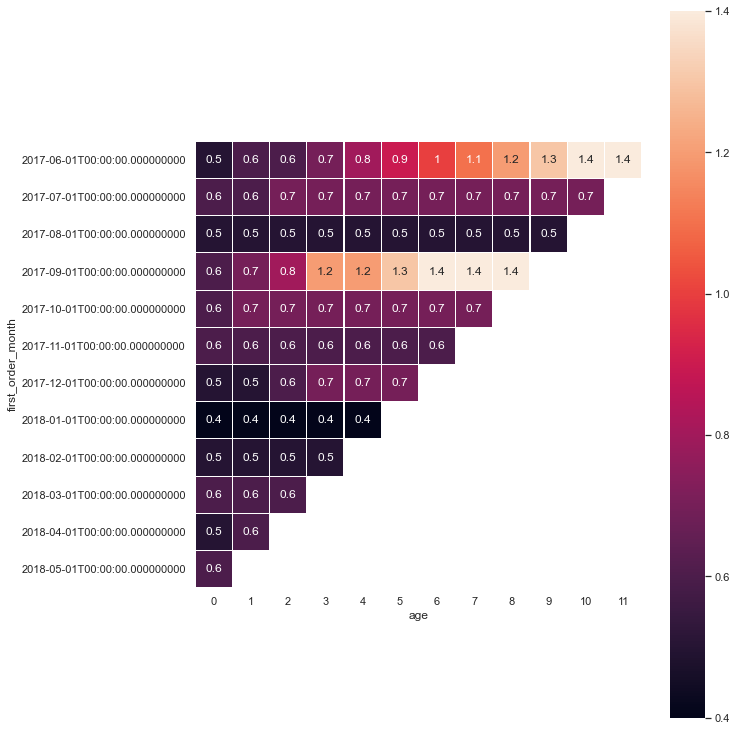

In [59]:
report_costs['romi'] = report_costs['ltv'] / report_costs['cac']
output_romi = report_costs.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean').round(1).cumsum(axis=1)

output_romi.fillna('') 
plt.figure(figsize=(10, 13))
#plt.title('ROMI per user per cohorts')
sns.heatmap(output_romi, square=True, linewidths=0.1, annot=True, annot_kws = {"fontsize":12});

<div style='color:blue'>ROI analysis shows that the breakeven point is at hte 7th month of purchase.
    </div>
 

In [60]:
output.cumsum(axis=1).round(2) 
output.cumsum(axis=1).mean(axis=0)

age
0       4.800000
1      10.327273
2      16.180000
3      22.977778
4      30.900000
5      40.014286
6      48.833333
7      59.360000
8      72.500000
9      74.700000
10     86.300000
11    102.500000
dtype: float64

### 4 Conclusion
What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

<div style='color:blue'>
    The average number of people visiting the application monthly 23228, weekly 5825 and daily 907. As per plots, the users are most active in November, December and January. We have concluded in the CAC calculation part that the August, November, January and April are most spenders of the marketing budget. April and August are maybe not very useful to invest in.<br>      
    We learned that the total unique users are 228169. 176040 users never returned. It means that 52129 users came back once or more times. It is about 22,8%. Probably we need more information on the average market benchmark.<br>
       The average number of people visiting the application monthly 23228, weekly 5825 and daily 907. <br>
    The most of the returned users purchase on the first day, but the mean value per source differs. Users coming from source 5 and 10 are more ready to make purchase. Other sources bring users who prefer to postpone the purchase.<br>
    The highest number of orders are produced by 1, 2, 4 sources. One purchase for from Source 7 is irrelevant. Sources 6, 7 and 8 did not bring any purchases. June, October, November and December most productive on selling. The total sales are high on 1-5 sources. The ountstanding is 1, twice as larger in amount that source number 2.<br>
    CAC per source shows that most expensive sources are 1,2,3 and 5. The profit bring sources 1,2.<br>
    ROI shows that the breakeven point is at the 7th month of purchase.
    Overall I would recommend to invest more on the source 1 and 2 because it is more profitable and reduce the rest as they are either less profitable or do not attract users.
</div>

<div style='color:blue'>Costs distribution per sources - most expensive sources are 3,4,5.
CAC per puser (your calculation doesn't look proper - you can compare - we have CAC ~ 350k costs / 35k buyers ~ 10 per user ) - 9.3
ROMI and average pay off - 7th month
    </div>

#### [Project plan](#Project-plan)